In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from io import StringIO

In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Your task is to design a visualization that you believe effectively communicates the data and provide a short write-up describing your design. You can use any data visualization tool you want.

Start with the dataset weather.csv which contains weather measurements nearest to Cornell Tech every day from 1950 to the present.

In [16]:
# Create a DataFrame
weather_data = pd.read_csv('weather.csv')

Notice that the temperature (Ktemp) is in Kelvin rather than in Fahrenheit. Define a variable that expresses the temperature in Fahrenheit, using the following formula:

Ftemp = (Ktemp − 273.15) * (9/5) + 32

In [22]:
weather_data['Ftemp'] = (weather_data['Ktemp'] - 273.15) * (9/5) + 32

Part A) For every month of the year, plot the average temperature (in Fahrenheit) using a scatter plot or line plot. Your visual should be configurable so that a user can easily look at a specific year’s weather curve (use a sliding scale filter). (6 points)

ValueError: x and y must have same first dimension, but have shapes (864, 3) and (26298,)

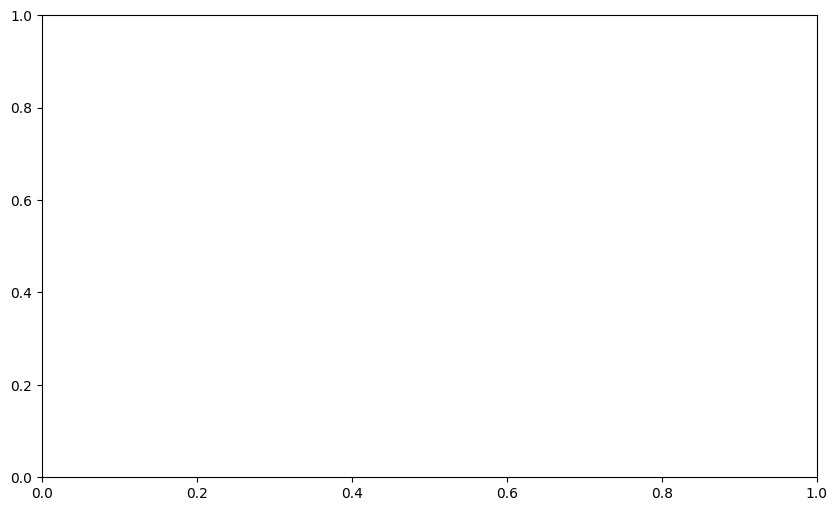

In [27]:
# # Extract month
# weather_data['Month'] = pd.to_datetime(weather_data['time']).dt.month
# weather_data['Year'] = pd.to_datetime(weather_data['time']).dt.year

# # Calculate monthly average
# monthly_avg_temps = weather_data.groupby(['Month','Year'])['Ftemp'].mean().reset_index()

# # Plot the data
# plt.figure(figsize=(10, 6))
# # Implement your visualization here (scatter plot or line plot)
# # Don't forget to add labels, legends, and the sliding scale filter
# plt.plot(monthly_avg_temps, weather_data['Year'], label='Monthly Average Temperature Over the Years')
# plt.title('Monthly Average Temperature Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Average Temperature (Fahrenheit)')
# plt.legend(title='Year')
# plt.show()

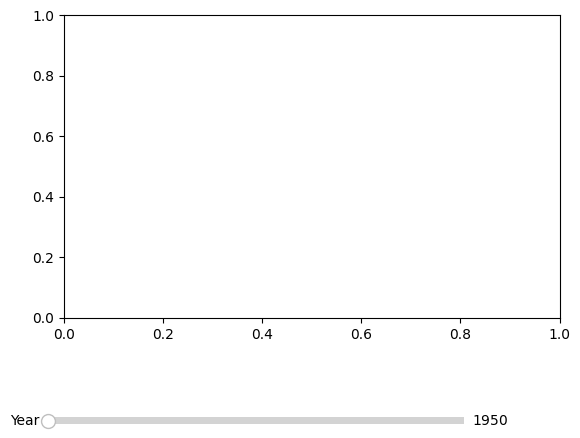

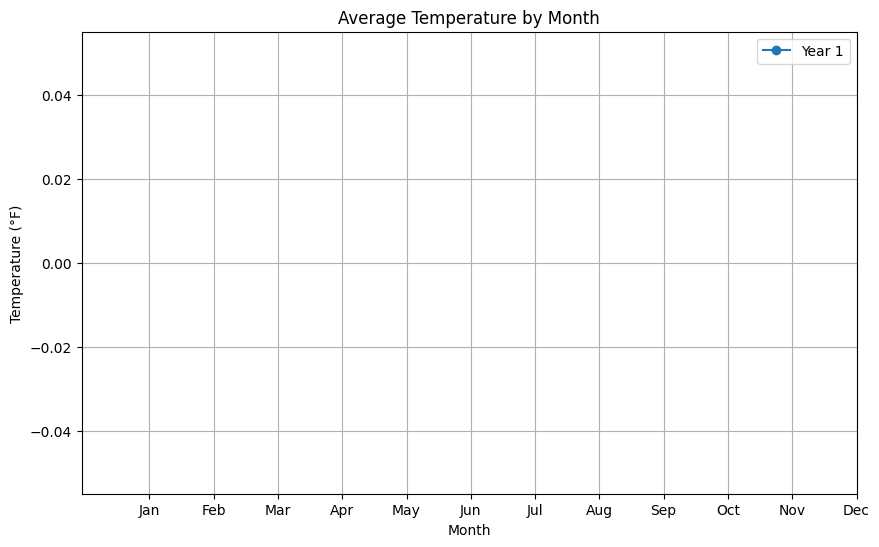

In [35]:
# Assuming your DataFrame is named 'weather_data' and contains columns 'Timestamp', 'Ktemp'
# Replace 'YourDataFrame' and 'Timestamp', 'Ktemp' with the actual names from your data

# Convert Kelvin to Fahrenheit using the provided formula

# Extract month and year from the timestamp
weather_data['Month'] = pd.to_datetime(weather_data['time']).dt.month
weather_data['Year'] = pd.to_datetime(weather_data['time']).dt.year

# Calculate average temperature for each month
average_temp_by_month = weather_data.groupby(['Year', 'Month'])['Ftemp'].mean().reset_index()

# Create a slider
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
ax_slider = plt.axes([0.1, 0.02, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_year = Slider(ax_slider, 'Year', average_temp_by_month['Year'].min(), average_temp_by_month['Year'].max())

# # Plotting
# def plot_average_temperature(year):
#     plt.figure(figsize=(10, 6))
    
#     # Filter data for the specified year
#     year_data = average_temp_by_month[average_temp_by_month['Year'] == year]
    
#     # Plotting
#     plt.plot(year_data['Month'], year_data['Ftemp'], marker='o', linestyle='-', label=f'Year {year}')
    
#     # Customize the plot
#     plt.title('Average Temperature by Month')
#     plt.xlabel('Month')
#     plt.ylabel('Temperature (°F)')
#     plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#     plt.legend()
#     plt.grid(True)
    
#     # Show the plot
#     plt.show()

# Plotting
def plot_average_temperature(year):
    plt.figure(figsize=(10, 6))
    
    # Filter data for the specified year
    year_data = average_temp_by_month[average_temp_by_month['Year'] == year]
    
    # Plotting
    plt.plot(year_data['Month'], year_data['Ftemp'], marker='o', linestyle='-', label=f'Year {year}')
    
    # Customize the plot
    plt.title('Average Temperature by Month')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°F)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()
    
# Update the plot when the slider value changes
def update(val):
    selected_year = int(slider_year.val)
    plot_average_temperature(selected_year)

slider_year.on_changed(update)

# Show the initial plot
plot_average_temperature(average_temp_by_month['Year'].min())

# Display the slider and plot
plt.show()

# # Example: Plotting for the year 1959
# plot_average_temperature(1959)


Part B) Based on all of the data, when is the first year where the year's average temperature passes 55 degrees (when will Cornell Tech finally be warm?) (2 points)

In [ ]:
# Find the first year above 55 degrees
warm_year = monthly_avg[monthly_avg['Ftemp'] > 55]['year'].min()
print(f"The first year when the average temperature exceeded 55 degrees: {warm_year}")

Part C) Create a new sheet where you do something creative through data visualization. Express something about the temperature over time(e.g. Look in the cycle of temperature over seasons, etc ) using this dataset, or add a new dataset(any available dataset online is fine) and find some correlation with the temperature (e.g. Number of some kind of fish in the ocean, etc, does the number of it go up and down following the temperature trend? Etc.). (2 points)